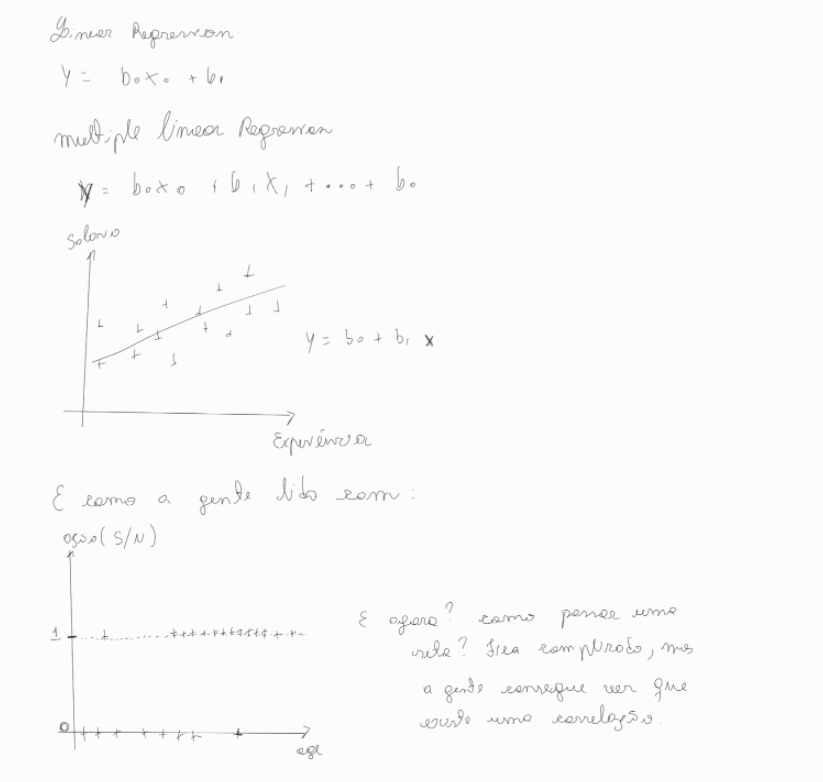
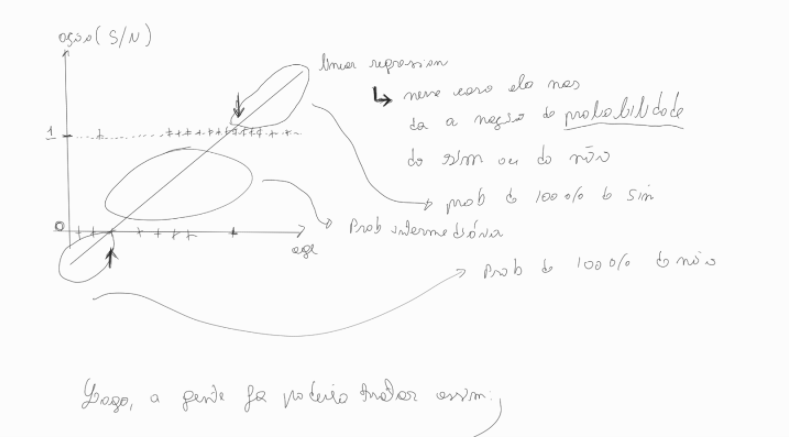
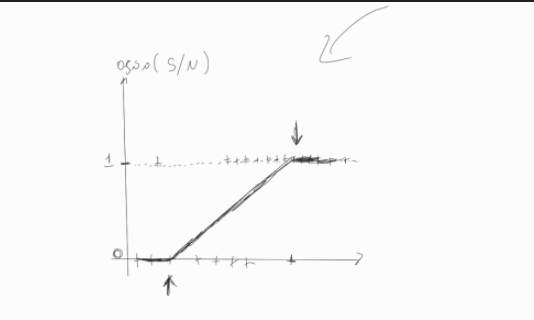
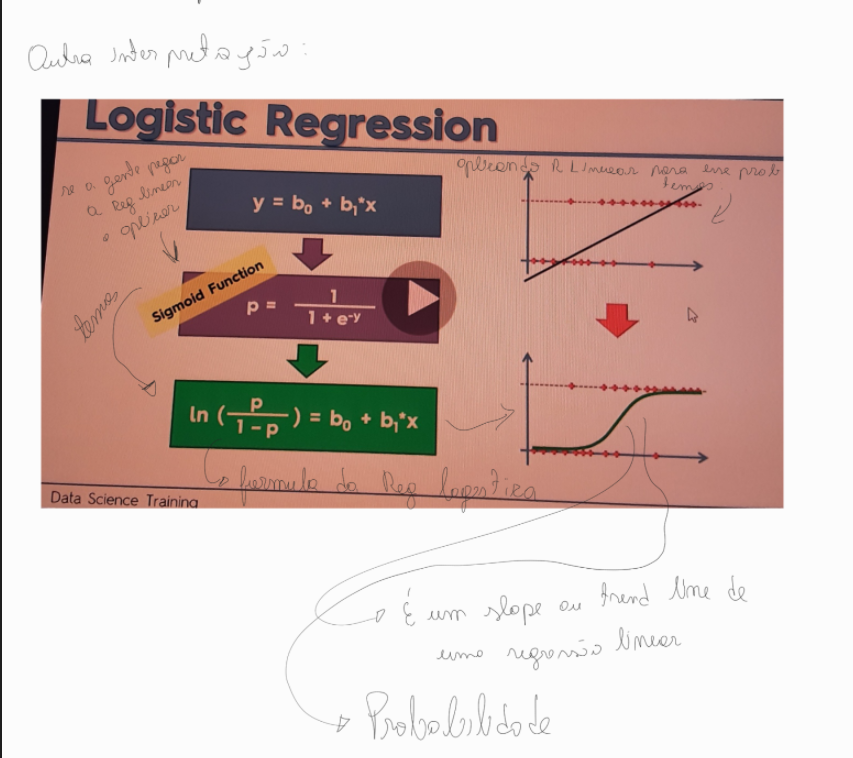
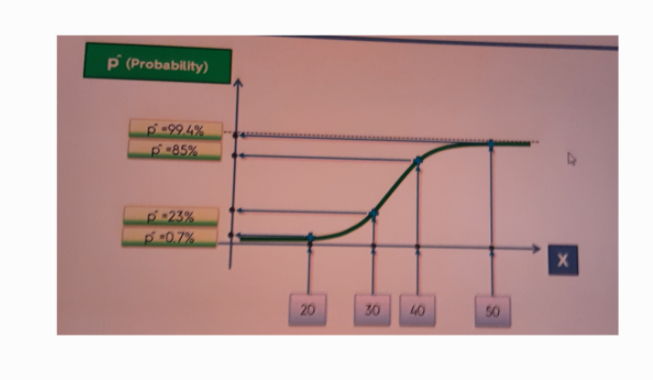

apesar de usar uma sigmod a regressão logistica ainda é **linear**.
Ver charts no final

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("Social_Network_Ads.csv")
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [5]:
from sklearn.linear_model import LogisticRegression
classificator = LogisticRegression(random_state=0)
classificator.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [6]:
classificator.predict([[30, 87000]]) ## wrong because wrong scalle

array([1], dtype=int64)

In [7]:
classificator.predict(sc.transform([[30, 87000]]))

array([0], dtype=int64)

In [8]:
y_pred = classificator.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


In [29]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 68, 1: 32}

In [9]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test, y_pred)

<AxesSubplot:>

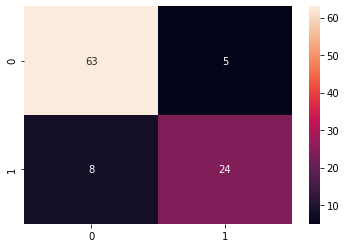

In [10]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

<AxesSubplot:>

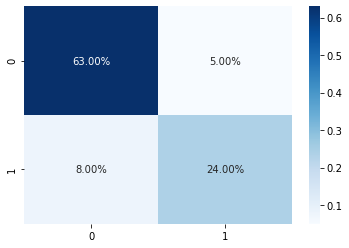

In [11]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.87

https://www.pycm.ir/doc/index.html#From-vector

In [13]:
from pycm import *
cm = ConfusionMatrix(y_test, y_pred,digit=5)

In [14]:
cm.class_stat

{'TPR': {0: 0.9264705882352942, 1: 0.75},
 'TNR': {0: 0.75, 1: 0.9264705882352942},
 'PPV': {0: 0.8873239436619719, 1: 0.8275862068965517},
 'NPV': {0: 0.8275862068965517, 1: 0.8873239436619719},
 'FNR': {0: 0.07352941176470584, 1: 0.25},
 'FPR': {0: 0.25, 1: 0.07352941176470584},
 'FDR': {0: 0.11267605633802813, 1: 0.1724137931034483},
 'FOR': {0: 0.1724137931034483, 1: 0.11267605633802813},
 'ACC': {0: 0.87, 1: 0.87},
 'F1': {0: 0.9064748201438849, 1: 0.7868852459016393},
 'MCC': {0: 0.6954248270544467, 1: 0.6954248270544467},
 'BM': {0: 0.6764705882352942, 1: 0.6764705882352942},
 'MK': {0: 0.7149101505585236, 1: 0.7149101505585236},
 'PLR': {0: 3.7058823529411766, 1: 10.200000000000005},
 'NLR': {0: 0.09803921568627445, 1: 0.2698412698412698},
 'DOR': {0: 37.800000000000026, 1: 37.80000000000002},
 'TP': {0: 63, 1: 24},
 'TN': {0: 24, 1: 63},
 'FP': {0: 8, 1: 5},
 'FN': {0: 5, 1: 8},
 'POP': {0: 100, 1: 100},
 'P': {0: 68, 1: 32},
 'N': {0: 32, 1: 68},
 'TOP': {0: 71, 1: 29},
 'TON

In [15]:
cm.overall_stat

{'Overall ACC': 0.87,
 'Kappa': 0.6936852026390198,
 'Overall RACC': 0.5756,
 'SOA1(Landis & Koch)': 'Substantial',
 'SOA2(Fleiss)': 'Intermediate to Good',
 'SOA3(Altman)': 'Good',
 'SOA4(Cicchetti)': 'Good',
 'SOA5(Cramer)': 'Strong',
 'SOA6(Matthews)': 'Moderate',
 'TNR Macro': 0.8382352941176471,
 'TPR Macro': 0.8382352941176471,
 'FPR Macro': 0.16176470588235292,
 'FNR Macro': 0.16176470588235292,
 'PPV Macro': 0.8574550752792618,
 'ACC Macro': 0.87,
 'F1 Macro': 0.8466800330227622,
 'TNR Micro': 0.87,
 'FPR Micro': 0.13,
 'TPR Micro': 0.87,
 'FNR Micro': 0.13,
 'PPV Micro': 0.87,
 'F1 Micro': 0.87,
 'Scott PI': 0.6933600660455242,
 'Gwet AC1': 0.7743251453866852,
 'Bennett S': 0.74,
 'Kappa Standard Error': 0.07924209104995399,
 'Kappa 95% CI': (0.53837070418111, 0.8489997010969296),
 'Chi-Squared': 48.36156900837071,
 'Phi-Squared': 0.4836156900837071,
 'Cramer V': 0.6954248270544466,
 'Chi-Squared DF': 1,
 '95% CI': (0.8040845268544631, 0.9359154731455369),
 'Standard Error': 0

In [16]:
cm.table

{0: {0: 63, 1: 5}, 1: {0: 8, 1: 24}}

In [17]:
cm.matrix

{0: {0: 63, 1: 5}, 1: {0: 8, 1: 24}}

In [18]:
cm.normalized_matrix

{0: {0: 0.92647, 1: 0.07353}, 1: {0: 0.25, 1: 0.75}}

In [19]:
cm.normalized_table

{0: {0: 0.92647, 1: 0.07353}, 1: {0: 0.25, 1: 0.75}}

In [20]:
cm.print_matrix()

Predict  0        1        
Actual
0        63       5        

1        8        24       




*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


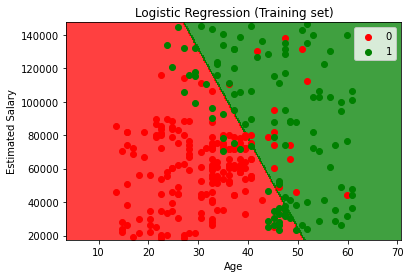

In [31]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classificator.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


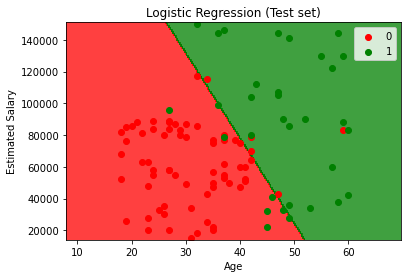

In [32]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classificator.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()